# Inference for one image

In [ ]:
from inference import Inference_model
from utils import get_h, get_pz_quantils
import cv2
import os
import numpy as np

In [ ]:
segmentor = Inference_model('../asbest/asbest_segmentation_b3_v1.3.pth', device='cpu')

In [10]:
from datetime import datetime

img = cv2.imread('/home/vasily/datasets/asbestos/stones/161220/ManualGeneralImage_10_01_26.bmp', cv2.IMREAD_UNCHANGED)
now = datetime.now()
asb = segmentor.predict(img)
print(datetime.now() - now)

0:00:48.218341


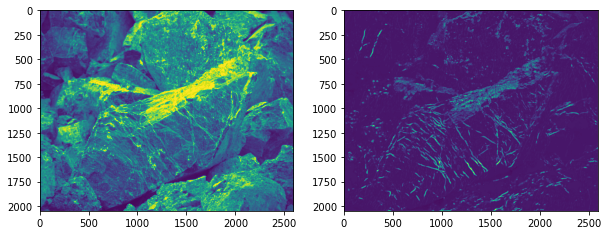

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(asb)

# Inference and asbestos concentration for sequances

In [1]:
from inference import Inference_model
from utils import get_h, get_pz_quantils
import cv2
import os
import numpy as np

In [2]:
segmentor = Inference_model('../asbest/asbest_segmentation_b3_v1.3.pth', device='cpu')

In [3]:
full_path = '/home/vasily/datasets/asbestos/stones/161220/'
img_pathes = [os.path.join(full_path, path) for path in os.listdir(full_path) if path.startswith('Manual')]
img_pathes

['/home/vasily/datasets/asbestos/stones/161220/ManualDetailedImage_11_06_02.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualDetailedImage_10_10_10.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualDetailedImage_10_03_00.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualDetailedImage_11_03_34.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualGeneralImage_09_31_25.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualGeneralImage_09_35_52.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualDetailedImage_11_09_00.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualDetailedImage_10_29_22.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualDetailedImage_11_05_06.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualDetailedImage_11_09_58.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualDetailedImage_10_04_15.bmp',
 '/home/vasily/datasets/asbestos/stones/161220/ManualDetailedImage_10_03_35.bmp',
 '/home/vasily/dat

In [ ]:
def calculate_info(img_pathes, thresh=0.5):
    results = []
    for obj in img_pathes:
        img = cv2.imread(obj, cv2.IMREAD_UNCHANGED)
        asb = segmentor.predict(img)
        results.append(len(np.where(asb > thresh)[0]) / img.shape[0] / img.shape[1])
    return results

results = calculate_info(img_pathes)
results

In [ ]:
h = get_h(results)
_, asbest_content, _ = get_pz_quantils(results, h)
print('Концентрация асбеста: ', asbest_content)